In [1]:
import pandas as pd
import numpy as np

In [13]:
db = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Time Series\danube_river_discharge.csv', 
                 index_col= 'Year',parse_dates= True) 

In [14]:
db.head()

,Discharge
Year,
1837-01-01,6315.937
1838-01-01,6015.683
1839-01-01,4525.167
1840-01-01,5361.574
1841-01-01,4267.812


In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Year'>

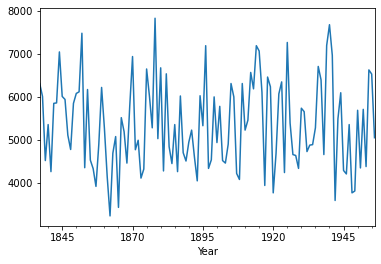

In [15]:
db.Discharge.plot()

In [10]:
db.isnull().sum()

Discharge    0
dtype: int64

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
abc = seasonal_decompose(db.Discharge)

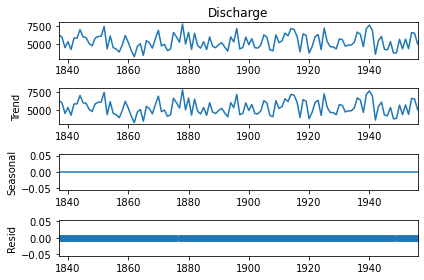

In [20]:
abc.plot();

In [21]:
db_train = db.iloc[0:100] 
db_test = db.iloc[100::]

In [22]:
db_train.shape

(100, 1)

In [23]:
db_test.shape

(20, 1)

In [24]:
import pmdarima
from pmdarima import auto_arima

In [25]:
auto_arima(db.Discharge)

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model_db = SARIMAX(db_train.Discharge, order=(1, 0, 1))

# We will now do trial and error in order as 0,0,0 cannot give any good result

C:\Users\RahulK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [34]:
result = model_db.fit()

C:\Users\RahulK\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [35]:
pred = result.predict(start = 100, end = 119)

In [36]:
pred

1937-01-01    5352.267445
1938-01-01    5352.266899
1939-01-01    5352.266353
1940-01-01    5352.265807
1941-01-01    5352.265260
1942-01-01    5352.264714
1943-01-01    5352.264168
1944-01-01    5352.263621
1945-01-01    5352.263075
1946-01-01    5352.262529
1947-01-01    5352.261982
1948-01-01    5352.261436
1949-01-01    5352.260890
1950-01-01    5352.260344
1951-01-01    5352.259797
1952-01-01    5352.259251
1953-01-01    5352.258705
1954-01-01    5352.258158
1955-01-01    5352.257612
1956-01-01    5352.257066
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [39]:
error = db_test.Discharge - pred

In [ ]:
mse = np.mean(np.square(error))
mse 

In [41]:
mse = np.mean(np.square(error))
mse

1463357.9932748934

In [ ]:
# Data is random and so we cannot build time series model